# Bussiness Problem

In [1]:
# import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/attaurrahmanpl/Machine_Learning/main/student_info.csv")



In [4]:
# first five records 
data.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


In [5]:
# last five records
data.tail()

,study_hours,student_marks
195,7.53,81.67
196,8.56,84.68
197,8.94,86.75
198,6.60,78.05
199,8.35,83.50


In [6]:
# the shape function show all the records and feature number of the data
data.shape

(200, 2)

# \# Visulize the data to gain insights

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   study_hours    195 non-null    float64
 1   student_marks  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB


In [8]:
data.describe()

,study_hours,student_marks
count,195.000000,200.00000
mean,6.995949,77.93375
std,1.253060,4.92570
min,5.010000,68.57000
25%,5.775000,73.38500
50%,7.120000,77.71000
75%,8.085000,82.32000
max,8.990000,86.99000


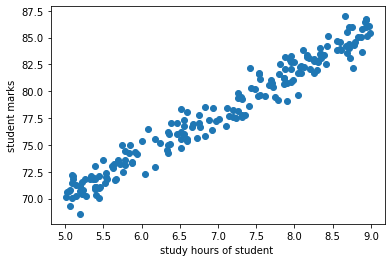

In [9]:
plt.scatter(x = data.study_hours , y = data.student_marks)
plt.xlabel("study hours of student ")
plt.ylabel("student marks")
plt.show()


In [10]:
# from the graph we are getting that there is linear relation between marks and study of hours


# Prepare the data for machine learning algorithm

In [11]:
# Data cleaning
data.isnull()
# this function show the null missing values in data

,study_hours,student_marks
0,False,False
1,False,False
2,True,False
3,False,False
4,False,False
...,...,...
195,False,False
196,False,False
197,False,False
198,False,False


In [12]:
# here we can see that there is five records in study hours column having null value
data.isnull().sum()


study_hours      5
student_marks    0
dtype: int64

In [13]:
# let find the mean of the data feature and place mean value in missing points
mean = data.mean()
print(mean)
clean_data = data.fillna(mean)
# mean_std_marks = data['student_marks'].mean()
# print(mean_std_marks)


study_hours       6.995949
student_marks    77.933750
dtype: float64


In [14]:
# now we can see that there is no missing values in the data frame
clean_data.isnull().sum()

study_hours      0
student_marks    0
dtype: int64

In [15]:
clean_data.head()

,study_hours,student_marks
0,6.830000,78.50
1,6.560000,76.74
2,6.995949,78.68
3,5.670000,71.82
4,8.670000,84.19


In [16]:
# split dataset

x = clean_data.drop('student_marks' , axis = 'columns')
y = clean_data.drop('study_hours' , axis = 'columns') 

print("shape of x = " , x.shape)
print("shape of y = " , y.shape)

shape of x =  (200, 1)
shape of y =  (200, 1)


In [17]:
# !pip install sklearn
# import sklearn


In [18]:
# import sklearn

In [19]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=51)

print("shape of x_train = " , x_train.shape)
print("shape of y_train = " , y_train.shape)
print("shape of x_test = " , x_test.shape)
print("shape of y_test = " , y_test.shape)


shape of x_train =  (160, 1)
shape of y_train =  (160, 1)
shape of x_test =  (40, 1)
shape of y_test =  (40, 1)


# select a  model and train it

In [20]:
# from the scatter chart we are get that our data has linear relation with each othe 
# so will will use linear regration model here
# y = m * x + c
from sklearn.linear_model import LinearRegression

lr = LinearRegression()


In [21]:
lr.fit(x_train , y_train)

LinearRegression()

In [22]:
coefieient_m = lr.coef_
intercept_c = lr.intercept_
print(coefieient_m)
print(intercept_c)

[[3.93571802]]
[50.44735504]


In [23]:
# # now put values in quation
# y = 3.93571802 * 8.670000 + 50.44735504
# # print(y)

In [24]:
# predict values manually
lr.predict([[4]])[0][0].round(2)

/home/attaur/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


66.19

In [25]:
# here predict all the test data data
y_pred =lr.predict(x_test).round(2)

In [26]:
y_pred

array([[83.11],
       [78.9 ],
       [84.57],
       [85.83],
       [84.73],
       [80.75],
       [72.84],
       [71.66],
       [73.24],
       [71.66],
       [73.47],
       [76.38],
       [73.24],
       [73.59],
       [82.96],
       [70.4 ],
       [73.24],
       [78.75],
       [75.56],
       [82.68],
       [76.66],
       [70.48],
       [74.77],
       [77.98],
       [85.59],
       [82.56],
       [76.42],
       [85.04],
       [78.39],
       [81.38],
       [81.74],
       [83.15],
       [82.21],
       [81.11],
       [73.59],
       [71.15],
       [71.9 ],
       [81.54],
       [72.61],
       [71.94]])

# now we compare the actual and predicted values

In [27]:
pd.DataFrame(np.c_[x_test , y_test , y_pred] , columns = ["study_hours" , "std_actual_marks" , 'std_predicted_marks'])

,study_hours,std_actual_marks,std_predicted_marks
0,8.300000,82.02,83.11
1,7.230000,77.55,78.90
2,8.670000,84.19,84.57
3,8.990000,85.46,85.83
4,8.710000,84.03,84.73
5,7.700000,80.81,80.75
6,5.690000,73.61,72.84
7,5.390000,70.90,71.66
8,5.790000,73.14,73.24
9,5.390000,73.02,71.66


In [28]:
# here we check the accuracy of the model
lr.score(x_test , y_test)


0.9514124242154464

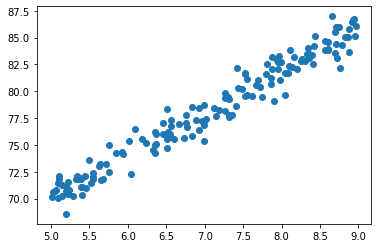

In [29]:
plt.scatter(x_train , y_train)
plt.show()

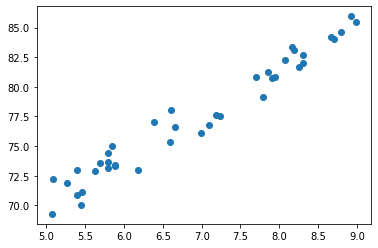

In [31]:
plt.scatter(x_test , y_test)
plt.show()